In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Classroom/uber_data.csv")


In [ ]:
df.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-03-01 00:00:00,2016-03-01 00:07:55,1,2.50,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,2.90,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,19.98,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,2,2016-03-01 00:00:00,2016-03-01 00:00:00,3,10.78,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,30.43,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               100000 non-null  int64  
 1   tpep_pickup_datetime   100000 non-null  object 
 2   tpep_dropoff_datetime  100000 non-null  object 
 3   passenger_count        100000 non-null  int64  
 4   trip_distance          100000 non-null  float64
 5   pickup_longitude       100000 non-null  float64
 6   pickup_latitude        100000 non-null  float64
 7   RatecodeID             100000 non-null  int64  
 8   store_and_fwd_flag     100000 non-null  object 
 9   dropoff_longitude      100000 non-null  float64
 10  dropoff_latitude       100000 non-null  float64
 11  payment_type           100000 non-null  int64  
 12  fare_amount            100000 non-null  float64
 13  extra                  100000 non-null  float64
 14  mta_tax                100000 non-nul

In [ ]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               100000 non-null  int64         
 1   tpep_pickup_datetime   100000 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  100000 non-null  datetime64[ns]
 3   passenger_count        100000 non-null  int64         
 4   trip_distance          100000 non-null  float64       
 5   pickup_longitude       100000 non-null  float64       
 6   pickup_latitude        100000 non-null  float64       
 7   RatecodeID             100000 non-null  int64         
 8   store_and_fwd_flag     100000 non-null  object        
 9   dropoff_longitude      100000 non-null  float64       
 10  dropoff_latitude       100000 non-null  float64       
 11  payment_type           100000 non-null  int64         
 12  fare_amount            100000 non-null  float

In [ ]:
datetime_dim = df[['tpep_pickup_datetime','tpep_dropoff_datetime']].drop_duplicates().reset_index(drop=True)
datetime_dim['pick_hour'] = datetime_dim['tpep_pickup_datetime'].dt.hour
datetime_dim['pick_day'] = datetime_dim['tpep_pickup_datetime'].dt.day
datetime_dim['pick_month'] = datetime_dim['tpep_pickup_datetime'].dt.month
datetime_dim['pick_year'] = datetime_dim['tpep_pickup_datetime'].dt.year
datetime_dim['pick_weekday'] = datetime_dim['tpep_pickup_datetime'].dt.weekday

datetime_dim['drop_hour'] = datetime_dim['tpep_dropoff_datetime'].dt.hour
datetime_dim['drop_day'] = datetime_dim['tpep_dropoff_datetime'].dt.day
datetime_dim['drop_month'] = datetime_dim['tpep_dropoff_datetime'].dt.month
datetime_dim['drop_year'] = datetime_dim['tpep_dropoff_datetime'].dt.year
datetime_dim['drop_weekday'] = datetime_dim['tpep_dropoff_datetime'].dt.weekday

In [ ]:
datetime_dim['datetime_id'] = datetime_dim.index

In [ ]:
passenger_count_dim = df[['passenger_count']].drop_duplicates().reset_index(drop=True)
passenger_count_dim['passenger_count_id'] = passenger_count_dim.index
passenger_count_dim = passenger_count_dim[['passenger_count_id','passenger_count']]

trip_distance_dim = df[['trip_distance']].drop_duplicates().reset_index(drop=True)
trip_distance_dim['trip_distance_id'] = trip_distance_dim.index
trip_distance_dim = trip_distance_dim[['trip_distance_id','trip_distance']]

In [ ]:
datetime_dim = datetime_dim[['datetime_id', 'tpep_pickup_datetime', 'pick_hour', 'pick_day', 'pick_month', 'pick_year', 'pick_weekday',
                             'tpep_dropoff_datetime', 'drop_hour', 'drop_day', 'drop_month', 'drop_year', 'drop_weekday']]
#

In [ ]:
datetime_dim

,datetime_id,tpep_pickup_datetime,pick_hour,pick_day,pick_month,pick_year,pick_weekday,tpep_dropoff_datetime,drop_hour,drop_day,drop_month,drop_year,drop_weekday
0,0,2016-03-01 00:00:00,0,1,3,2016,1,2016-03-01 00:07:55,0,1,3,2016,1
1,1,2016-03-01 00:00:00,0,1,3,2016,1,2016-03-01 00:11:06,0,1,3,2016,1
2,2,2016-03-01 00:00:00,0,1,3,2016,1,2016-03-01 00:31:06,0,1,3,2016,1
3,3,2016-03-01 00:00:00,0,1,3,2016,1,2016-03-01 00:00:00,0,1,3,2016,1
4,4,2016-03-01 00:00:01,0,1,3,2016,1,2016-03-01 00:16:04,0,1,3,2016,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99848,99848,2016-03-01 06:17:10,6,1,3,2016,1,2016-03-01 06:22:15,6,1,3,2016,1
99849,99849,2016-03-01 06:17:10,6,1,3,2016,1,2016-03-01 06:32:41,6,1,3,2016,1
99850,99850,2016-03-01 06:17:10,6,1,3,2016,1,2016-03-01 06:37:23,6,1,3,2016,1
99851,99851,2016-03-01 06:17:10,6,1,3,2016,1,2016-03-01 06:22:09,6,1,3,2016,1


In [ ]:
datetime_dim.to_csv("datetime_dim.csv")

In [ ]:
passenger_count_dim

,passenger_count_id,passenger_count
0,0,1
1,1,2
2,2,3
3,3,5
4,4,6
5,5,4
6,6,0


In [ ]:
passenger_count_dim.to_csv("passenger_count_dim.csv")

In [ ]:
trip_distance_dim.head()

,trip_distance_id,trip_distance
0,0,2.50
1,1,2.90
2,2,19.98
3,3,10.78
4,4,30.43


In [ ]:
trip_distance_dim.to_csv("trip_distance_dim.csv")

In [ ]:
rate_code_type = {
    1:"Standard rate",
    2:"JFK",
    3:"Newark",
    4:"Nassau or Westchester",
    5:"Negotiated fare",
    6:"Group ride"
}

rate_code_dim = df[['RatecodeID']].drop_duplicates().reset_index(drop=True)
rate_code_dim['rate_code_id'] = rate_code_dim.index
rate_code_dim['rate_code_name'] = rate_code_dim['RatecodeID'].map(rate_code_type)
rate_code_dim = rate_code_dim[['rate_code_id','RatecodeID','rate_code_name']]


In [ ]:
rate_code_dim.head()

,rate_code_id,RatecodeID,rate_code_name
0,0,1,Standard rate
1,1,3,Newark
2,2,2,JFK
3,3,5,Negotiated fare
4,4,4,Nassau or Westchester


In [ ]:
rate_code_dim.to_csv("rate_code_dim.csv")

In [ ]:
pickup_location_dim = df[['pickup_longitude', 'pickup_latitude']].drop_duplicates().reset_index(drop=True)
pickup_location_dim['pickup_location_id'] = pickup_location_dim.index
pickup_location_dim = pickup_location_dim[['pickup_location_id','pickup_latitude','pickup_longitude']]


dropoff_location_dim = df[['dropoff_longitude', 'dropoff_latitude']].drop_duplicates().reset_index(drop=True)
dropoff_location_dim['dropoff_location_id'] = dropoff_location_dim.index
dropoff_location_dim = dropoff_location_dim[['dropoff_location_id','dropoff_latitude','dropoff_longitude']]

In [ ]:
payment_type_name = {
    1:"Credit card",
    2:"Cash",
    3:"No charge",
    4:"Dispute",
    5:"Unknown",
    6:"Voided trip"
}
payment_type_dim = df[['payment_type']].drop_duplicates().reset_index(drop=True)
payment_type_dim['payment_type_id'] = payment_type_dim.index
payment_type_dim['payment_type_name'] = payment_type_dim['payment_type'].map(payment_type_name)
payment_type_dim = payment_type_dim[['payment_type_id','payment_type','payment_type_name']]

In [ ]:
payment_type_dim.head()

,payment_type_id,payment_type,payment_type_name
0,0,1,Credit card
1,1,2,Cash
2,2,3,No charge
3,3,4,Dispute


In [ ]:
payment_type_dim.to_csv("payment_type_dim.csv")

In [ ]:
fact_table = df.merge(passenger_count_dim, on='passenger_count') \
             .merge(trip_distance_dim, on='trip_distance') \
             .merge(rate_code_dim, on='RatecodeID') \
             .merge(pickup_location_dim, on=['pickup_longitude', 'pickup_latitude']) \
             .merge(dropoff_location_dim, on=['dropoff_longitude', 'dropoff_latitude'])\
             .merge(datetime_dim, on=['tpep_pickup_datetime','tpep_dropoff_datetime']) \
             .merge(payment_type_dim, on='payment_type') \
             [['VendorID', 'datetime_id', 'passenger_count_id',
               'trip_distance_id', 'rate_code_id', 'store_and_fwd_flag', 'pickup_location_id', 'dropoff_location_id',
               'payment_type_id', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
               'improvement_surcharge', 'total_amount']]

In [ ]:
fact_table

,VendorID,datetime_id,passenger_count_id,trip_distance_id,rate_code_id,store_and_fwd_flag,pickup_location_id,dropoff_location_id,payment_type_id,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,0,0,0,0,N,0,0,0,9.0,0.5,0.5,2.05,0.0,0.3,12.35
1,2,1491,0,0,0,N,1481,1484,0,10.5,0.0,0.5,2.26,0.0,0.3,13.56
2,2,2834,0,0,0,N,2816,2819,0,9.5,0.0,0.5,1.25,0.0,0.3,11.55
3,2,3488,0,0,0,N,3465,3470,0,13.5,0.0,0.5,2.00,0.0,0.3,16.30
4,2,3923,0,0,0,N,3899,3903,0,10.5,0.0,0.5,2.26,0.0,0.3,13.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1,65943,0,257,3,N,64896,65105,3,170.0,0.0,0.0,0.00,0.0,0.3,170.30
99996,1,81651,0,257,3,N,80276,80547,3,10.0,0.0,0.0,0.00,0.0,0.3,10.30
99997,2,87152,4,257,1,N,85670,85971,3,-20.0,-0.5,0.0,0.00,0.0,-0.3,-20.80
99998,2,53874,4,1060,1,N,53081,53222,3,-25.5,0.0,0.0,0.00,0.0,-0.3,-25.80


In [ ]:
df.to_csv("fact_table.csv")


In [ ]:
import pandas as pd
df1 = pd.read_parquet('/content/drive/MyDrive/Classroom/yellow_tripdata_2023-01.parquet')


In [ ]:
df1

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.30,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.90,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.90,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.10,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.40,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3066761,2,2023-01-31 23:58:34,2023-02-01 00:12:33,NaN,3.05,NaN,None,107,48,0,15.80,0.00,0.5,3.96,0.0,1.0,23.76,NaN,NaN
3066762,2,2023-01-31 23:31:09,2023-01-31 23:50:36,NaN,5.80,NaN,None,112,75,0,22.43,0.00,0.5,2.64,0.0,1.0,29.07,NaN,NaN
3066763,2,2023-01-31 23:01:05,2023-01-31 23:25:36,NaN,4.67,NaN,None,114,239,0,17.61,0.00,0.5,5.32,0.0,1.0,26.93,NaN,NaN
3066764,2,2023-01-31 23:40:00,2023-01-31 23:53:00,NaN,3.15,NaN,None,230,79,0,18.15,0.00,0.5,4.43,0.0,1.0,26.58,NaN,NaN


## **Import CSV to perform following oprations**
**# Data Analysis- Clean the data by Removing null values & duplicate values**
# **Data Visualization**
# **Feature Data Selection for Model building**
## **Linear Regression Model**

In [ ]:
df1.to_csv("Uber-2023.csv")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
df= pd.read_csv("/content/drive/MyDrive/Uber 2023 CSV.csv")


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 54 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   price                        637976 non-null  float64
 10  distance                     693071 non-null  float64
 11  surge_multiplier             693071 non-null  float64
 12  latitude                     693071 non-null  float64
 13 

In [ ]:
df['datetime']=pd.to_datetime(df['datetime'])       # change the datetime datatype from Object to Datetime

In [ ]:
df.isnull().sum().sum()              # Attribute Price have 55095 missing values

55095

In [ ]:
df.dropna(axis=0,inplace=True)      # drop the null values

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df['visibility'].head()

0    10.000
1     4.786
2    10.000
3    10.000
4    10.000
Name: visibility, dtype: float64

In [ ]:
df['visibility.1'].head()         # There are 2 fieds witht the same name, so we will drop 1 column

0    10.000
1     4.786
2    10.000
3    10.000
4    10.000
Name: visibility.1, dtype: float64

In [ ]:
df = df.drop(['visibility.1'],axis=1)

In [ ]:
df.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.379760e+05,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,...,637976.000000,6.379760e+05,637976.000000,6.379760e+05,637976.000000,6.379760e+05,637976.000000,6.379760e+05,637976.000000,6.379760e+05
mean,1.544049e+09,11.618528,17.797674,11.586550,16.545125,2.189261,1.015068,42.338161,-71.066144,39.582406,...,0.037369,1.544044e+09,33.456171,1.544042e+09,45.259945,1.544047e+09,29.729028,1.544048e+09,41.995876,1.544048e+09
std,7.055387e+05,6.948776,9.982083,0.492452,9.324359,1.135413,0.095422,0.047856,0.020303,6.725500,...,0.055216,6.912268e+05,6.466349,6.902087e+05,5.644414,6.901597e+05,7.109907,6.872011e+05,6.935538,6.911036e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,...,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.270000,1.000000,42.350300,-71.081000,36.450000,...,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,...,0.000400,1.543770e+09,34.240000,1.543727e+09,44.660000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.930000,1.000000,42.364700,-71.054200,43.580000,...,0.091600,1.544807e+09,38.880000,1.544789e+09,46.910000,1.544814e+09,35.710000,1.544789e+09,44.120000,1.544818e+09
max,1.550000e+09,23.000000,30.000000,12.000000,97.500000,7.860000,3.000000,42.366100,-71.033000,57.220000,...,0.145900,1.545152e+09,43.100000,1.545192e+09,57.870000,1.545109e+09,40.050000,1.545134e+09,57.200000,1.545109e+09


**Extract data from datetime for visualization**



<ipython-input-29-ed3d9a6300e7>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["day"])


<Axes: xlabel='day', ylabel='Density'>

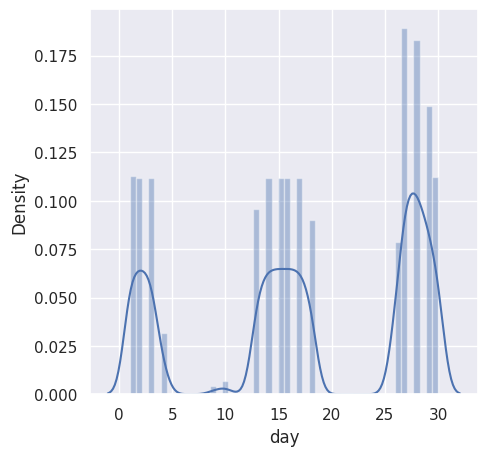

In [ ]:
sns.set(rc={'figure.figsize':(5,5)})              # day data visulaization using seaborn Module
sns.distplot(df["day"])

<ipython-input-30-02ea53171128>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["hour"])


<Axes: xlabel='hour', ylabel='Density'>

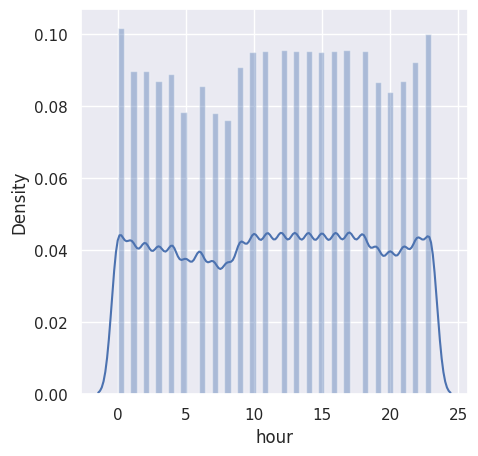

In [ ]:
sns.distplot(df["hour"])

In [ ]:
df.groupby(by=["destination","source"]).agg({'latitude':'mean','longitude':'mean'})      # Pickup and drop location and Latitude and Logitude

latitude  longitude
destination         source                                  
Brooklyn            Central Park        42.336378 -71.065388
                    Financial District  42.339660 -71.066504
                    Greenwich Village   42.338521 -71.066339
                    Lower Manhatten     42.337595 -71.065471
                    Queens              42.340103 -71.065819
...                                           ...        ...
World Trade Center  Harlem              42.338523 -71.065964
                    Manhatten           42.338338 -71.065965
                    Soho                42.337781 -71.065863
                    Upper East Side     42.338733 -71.066581
                    Washington Heights  42.338989 -71.067037

[72 rows x 2 columns]

In [ ]:
pd.set_option('display.max_rows', 10)
df.groupby(by=["source","destination"]).price.agg(["mean"])

mean
source              destination                  
Brooklyn            Central Park        18.232722
                    Financial District  19.701839
                    Greenwich Village   18.161806
                    Lower Manhatten     16.796674
                    Queens              13.802155
...                                           ...
World Trade Center  Harlem              21.918584
                    Manhatten           13.179635
                    Soho                13.188209
                    Upper East Side     25.498434
                    Washington Heights  12.349066

[72 rows x 1 columns]

In [ ]:
print('Maximum price in our data :',df.price.max())

Maximum price in our data : 97.5


In [ ]:
df[df['price']==df.price.max()][['source','destination']]

,source,destination
597071,World Trade Center,Brooklyn


### **To make linear regression model, First we check correlation between our features and Variable price by checking the correlation of temperature related features with Price**

In [ ]:
temp = ['temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh',
                'apparentTemperatureLow','temperatureMin','temperatureHighTime','temperatureMax','apparentTemperatureMin','apparentTemperatureMax','price']

In [ ]:
df_temp = df[temp]

In [ ]:
df_temp

,temperature,apparentTemperature,temperatureHigh,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,temperatureMin,temperatureHighTime,temperatureMax,apparentTemperatureMin,apparentTemperatureMax,price
0,42.34,37.12,43.68,34.19,37.95,27.39,39.89,1544968800,43.68,33.73,38.07,5.0
1,43.58,37.35,47.30,42.10,43.92,36.20,40.49,1543251600,47.30,36.20,43.92,11.0
2,38.33,32.93,47.55,33.10,44.12,29.11,35.36,1543320000,47.55,31.04,44.12,7.0
3,34.38,29.63,45.03,28.90,38.53,26.20,34.67,1543510800,45.03,30.30,38.53,26.0
4,37.44,30.88,42.18,36.71,35.75,30.29,33.10,1543420800,42.18,29.11,35.75,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...
693065,37.05,37.05,44.76,34.83,44.09,35.48,31.42,1543690800,44.76,27.77,44.09,9.5
693066,37.05,37.05,44.76,34.83,44.09,35.48,31.42,1543690800,44.76,27.77,44.09,13.0
693067,37.05,37.05,44.76,34.83,44.09,35.48,31.42,1543690800,44.76,27.77,44.09,9.5
693069,37.05,37.05,44.76,34.83,44.09,35.48,31.42,1543690800,44.76,27.77,44.09,27.0


<Axes: >

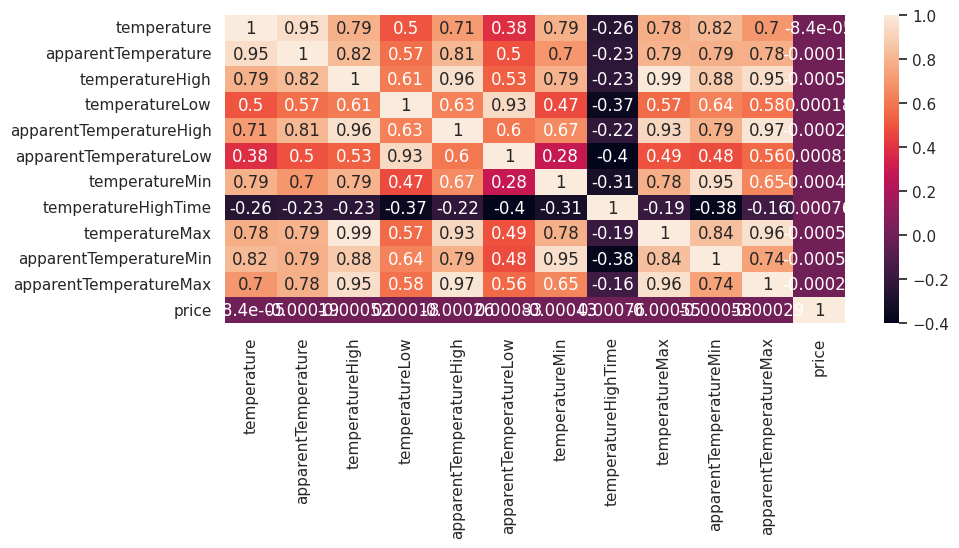

In [ ]:
sns.set(rc={'figure.figsize':(10,4)})
sns.heatmap(df_temp.corr(),annot=True)         # Correlation between Tempreture features and Price

In [ ]:
climate = ['precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'visibility', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'ozone', 'moonPhase',
       'precipIntensityMax','price']
df_climate = df[climate]
df_climate.head()

,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,dewPoint,pressure,windBearing,cloudCover,uvIndex,ozone,moonPhase,precipIntensityMax,price
0,0.0000,0.0,0.68,8.66,9.17,10.000,32.70,1021.98,57,0.72,0,303.8,0.30,0.1276,5.0
1,0.1299,1.0,0.94,11.98,11.98,4.786,41.83,1003.97,90,1.00,0,291.1,0.64,0.1300,11.0
2,0.0000,0.0,0.75,7.33,7.33,10.000,31.10,992.28,240,0.03,0,315.7,0.68,0.1064,7.0
3,0.0000,0.0,0.73,5.28,5.28,10.000,26.64,1013.73,310,0.00,0,291.1,0.75,0.0000,26.0
4,0.0000,0.0,0.70,9.14,9.14,10.000,28.61,998.36,303,0.44,0,347.7,0.72,0.0001,9.0


<Axes: >

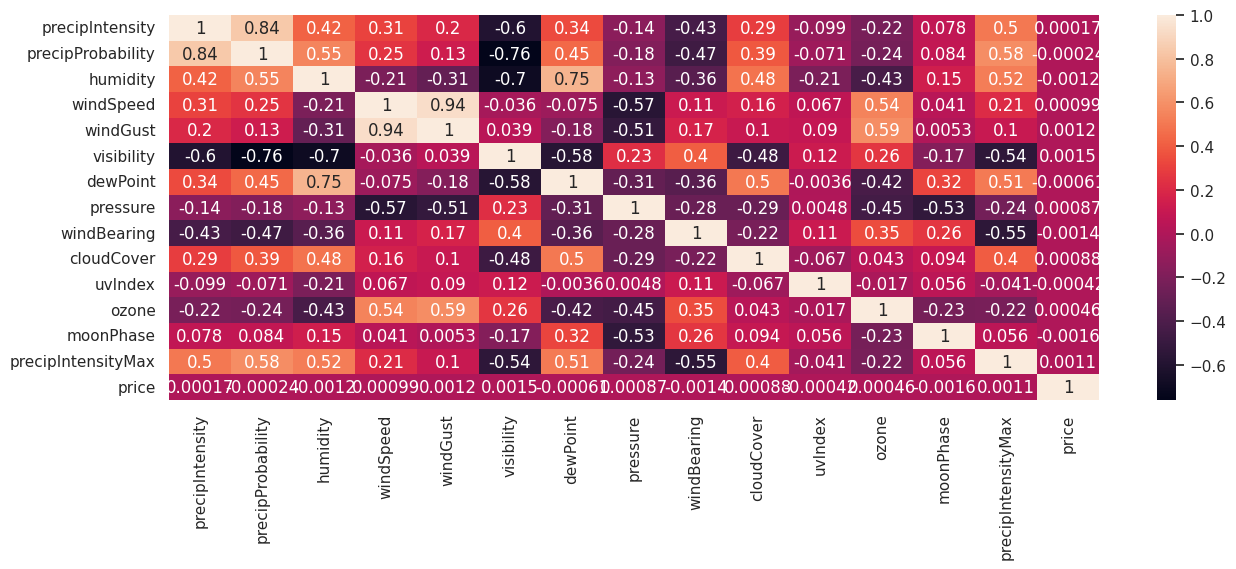

In [ ]:
sns.set(rc={'figure.figsize':(15,5)})           # this Corr between Climate and Price is observred to be low, no impact on Price
sns.heatmap(df_climate.corr(),annot=True)

In [ ]:
categorical_columns = ['source',  'destination',  'short_summary',  'icon','price']
df_cat = df[categorical_columns ]
df_cat.head()

,source,destination,short_summary,icon,price
0,Soho,Financial District,Mostly Cloudy,partly-cloudy-night,5.0
1,Soho,Financial District,Rain,rain,11.0
2,Soho,Financial District,Clear,clear-night,7.0
3,Soho,Financial District,Clear,clear-night,26.0
4,Soho,Financial District,Partly Cloudy,partly-cloudy-night,9.0


In [ ]:
from sklearn import preprocessing                               # This is for Preprocessing the Categorical features into 0,1,2,3,4 numbers in order to map with the price
le = preprocessing.LabelEncoder()

df_cat_encode= df_cat.copy()
for col in df_cat_encode.select_dtypes(include='O').columns:
    df_cat_encode[col]=le.fit_transform(df_cat_encode[col])

In [ ]:
df_cat_encode

,source,destination,short_summary,icon,price
0,8,2,4,5,5.0
1,8,2,8,6,11.0
2,8,2,0,1,7.0
3,8,2,0,1,26.0
4,8,2,6,5,9.0
...,...,...,...,...,...
693065,3,6,6,5,9.5
693066,3,6,6,5,13.0
693067,3,6,6,5,9.5
693069,3,6,6,5,27.0


<Axes: >

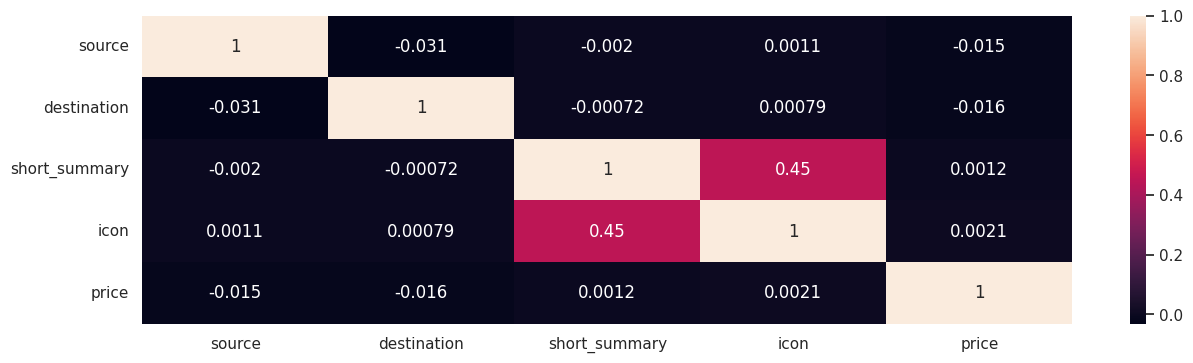

In [ ]:
plt.figure(figsize=(15,4))
sns.heatmap(df_cat_encode.corr(),annot=True)

### **Based on the above analysis all the newly created featured coulums to be dropped from the Df so that Only featured columns such as Price, Source, Destination,Surgemultiplier feature is to be considerd**

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


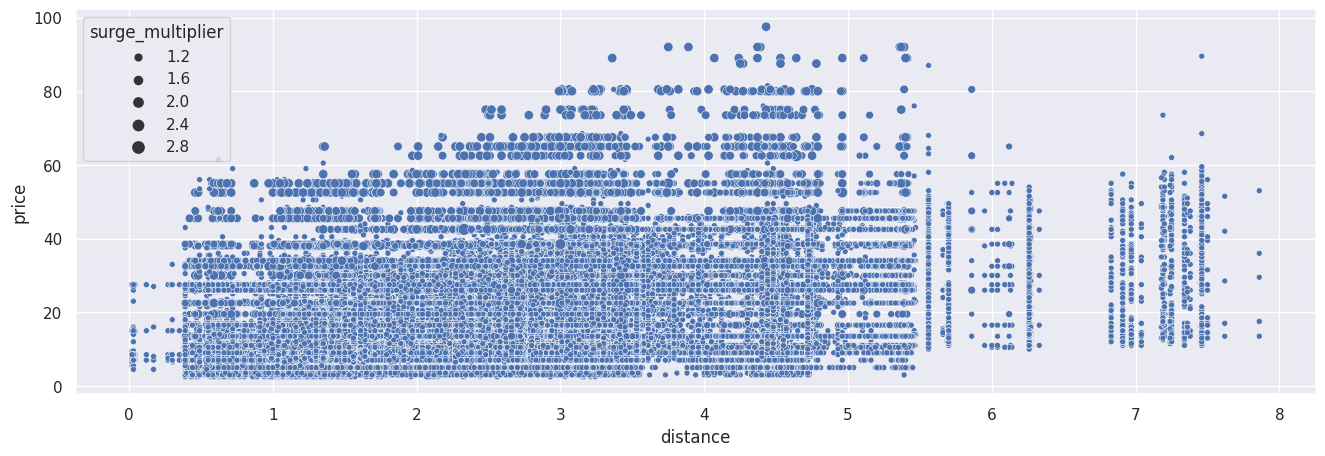

In [ ]:
df_1 = df[(df["hour"]>=22) | (df["hour"]<=4)]
plt.figure(figsize=(16,5))
sns.scatterplot(data = df, x = "distance",
                y = "price", size = "surge_multiplier")
plt.show()

### **Linear Regression Model**

In [ ]:
linear_df = df[["distance","surge_multiplier","price"]]
linear_df.dropna(inplace = True)

<ipython-input-80-08600860668a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  linear_df.dropna(inplace = True)


## **Data Splitting**

In [ ]:
#separate the other attributes from the predicting attribute
x = linear_df.drop("price",axis=1)
#separte the predicting attribute into Y for model training
y = linear_df["price"]

In [ ]:
# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

## **Linear regression Model Building**

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [ ]:
# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_prediction =  LR.predict(x_test)


In [ ]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,y_prediction)
print('r2 socre is ',score)
print('mean_sqrd_error is==',mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 socre is  0.17078020658333048
mean_sqrd_error is== 71.52890801636347
root_mean_squared error of is== 8.457476456743079


In [ ]:
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(x)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                 6.659e+04
Date:                Sat, 15 Jul 2023   Prob (F-statistic):               0.00
Time:                        09:11:12   Log-Likelihood:            -2.2691e+06
No. Observations:              637976   AIC:                         4.538e+06
Df Residuals:                  637973   BIC:                         4.538e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -12.5290      0.115  

In [ ]:
train_dataset = linear_df.sample(frac=0.8, random_state=0)
test_dataset = linear_df.drop(train_dataset.index)

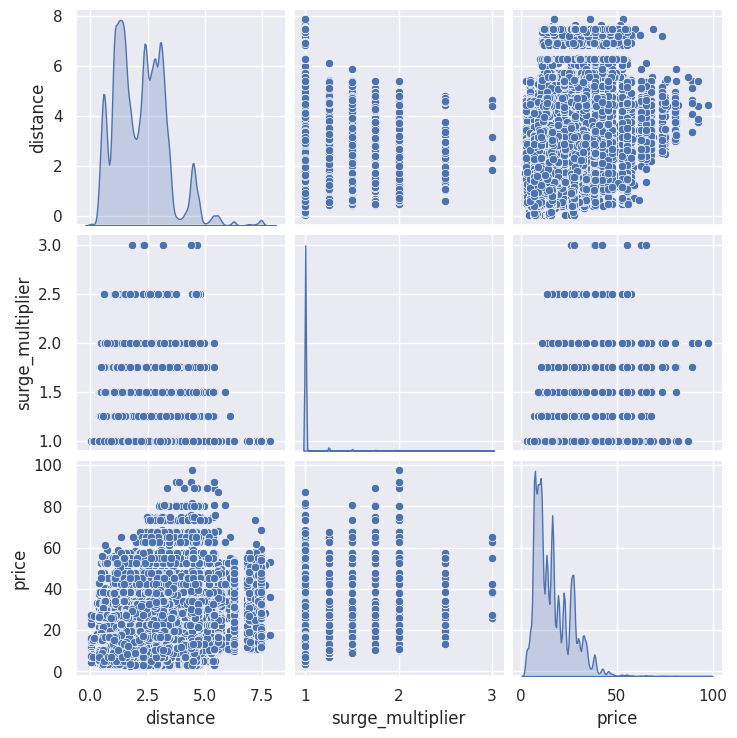

In [ ]:
import seaborn as sns
sns.pairplot(train_dataset,diag_kind='kde')